In [1]:
from TICC_solver import TICC
import numpy as np
import sys
import pandas as pd

fname = "Nov10Jan20COPRcleant.txt"
ticc = TICC(window_size=1, number_of_clusters=4, lambda_parameter=11e-2, beta=200, maxIters=100, threshold=2e-5,
            write_out_file=False, prefix_string="output_folder/", num_proc=1)
(cluster_assignment, cluster_MRFs) = ticc.fit(input_file=fname)

print(cluster_assignment)
np.savetxt('Results.txt', cluster_assignment, fmt='%d', delimiter='\t')

lam_sparse 0.11
switch_penalty 200
num_cluster 4
num stacked 1
completed getting the data



ITERATION ### 0
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
length of the cluster  0 ------> 1337
length of the cluster  1 ------> 775
length of the cluster  2 ------> 3986
length of the cluster  3 ------> 814
UPDATED THE OLD COVARIANCE
beginning the smoothening ALGORITHM
length of cluster # 0 --------> 953
length of cluster # 1 --------> 1761
length of cluster # 2 --------> 4035
length of cluster # 3 --------> 163
Done writing the figure







ITERATION ### 1
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
length of the cluster  0 ------> 953
length of the cluster  1 ------> 1761
length of the cluster  2 ------> 4035
length of the cluster  3 ------> 163
UPDATED THE OLD COVARIANCE
beginning th

In [2]:
df_test = pd.read_csv('Nov10Jan20COPRcleant.txt', delimiter = ",")
df_test
cnc = pd.DataFrame({'CG3Up': 358.9, 'CM3Up': 87.6}, index =[0])
df_test.columns = ['CG3Up','CM3Up']
df2 = pd.concat([cnc, df_test])
df2.head(5)

,358.9,87.6
0,365.6,110.100
1,339.0,67.880
2,336.7,21.680
3,334.5,1.209
4,335.4,-1.419
...,...,...
6906,281.9,425.900
6907,281.9,383.300
6908,282.0,331.200
6909,281.7,291.900


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
time = pd.read_csv('Nov10Jan20COPRtimet.txt', delimiter = ",")
timep = time['TIME PST']
timep

0       11/9/2017 16:15
1       11/9/2017 16:30
2       11/9/2017 16:45
3       11/9/2017 17:00
4       11/9/2017 17:15
             ...       
6907    1/20/2018 15:00
6908    1/20/2018 15:15
6909    1/20/2018 15:30
6910    1/20/2018 15:45
6911    1/20/2018 16:00
Name: TIME PST, Length: 6912, dtype: object

In [6]:
cluster_index = np.where(np.roll(cluster_assignment,1)!=cluster_assignment)[0]
cluster_index
cluster_high=[]
end_len = (len(cluster_assignment)-1)
for i in cluster_index:
    cluster_high.append(cluster_assignment[i])
cluster_index = np.append(cluster_index,end_len)
if cluster_index[0] != 0:
    cluster_index = np.insert(cluster_index,0,0)
cluster_index

array([   0,    4,   58,  100,  154,  196,  250,  293,  346,  388,  442,
        484,  538,  580,  634,  676,  731,  772,  826,  868,  922,  964,
       1018, 1060, 1115, 1156, 1210, 1252, 1306, 1347, 1403, 1443, 1499,
       1539, 1595, 1635, 1692, 1732, 1787, 1828, 1883, 1924, 1979, 2020,
       2075, 2116, 2171, 2211, 2268, 2307, 2363, 2403, 2459, 2499, 2555,
       2595, 2652, 2691, 2747, 2787, 2844, 2883, 2940, 2980, 3036, 3076,
       3132, 3172, 3227, 3268, 3324, 3363, 3419, 3459, 3516, 3556, 3612,
       3652, 3708, 3748, 3804, 3844, 3900, 3940, 3996, 4036, 4092, 4132,
       4188, 4228, 4284, 4324, 4380, 4420, 4476, 4516, 4572, 4612, 4668,
       4708, 4763, 4804, 4860, 4900, 4957, 4996, 5052, 5093, 5149, 5188,
       5244, 5572, 5628, 5836, 5861, 5917, 5957, 6012, 6053, 6108, 6149,
       6204, 6245, 6300, 6340, 6396, 6437, 6493, 6533, 6588, 6629, 6684,
       6725, 6779, 6821, 6876, 6911], dtype=int64)

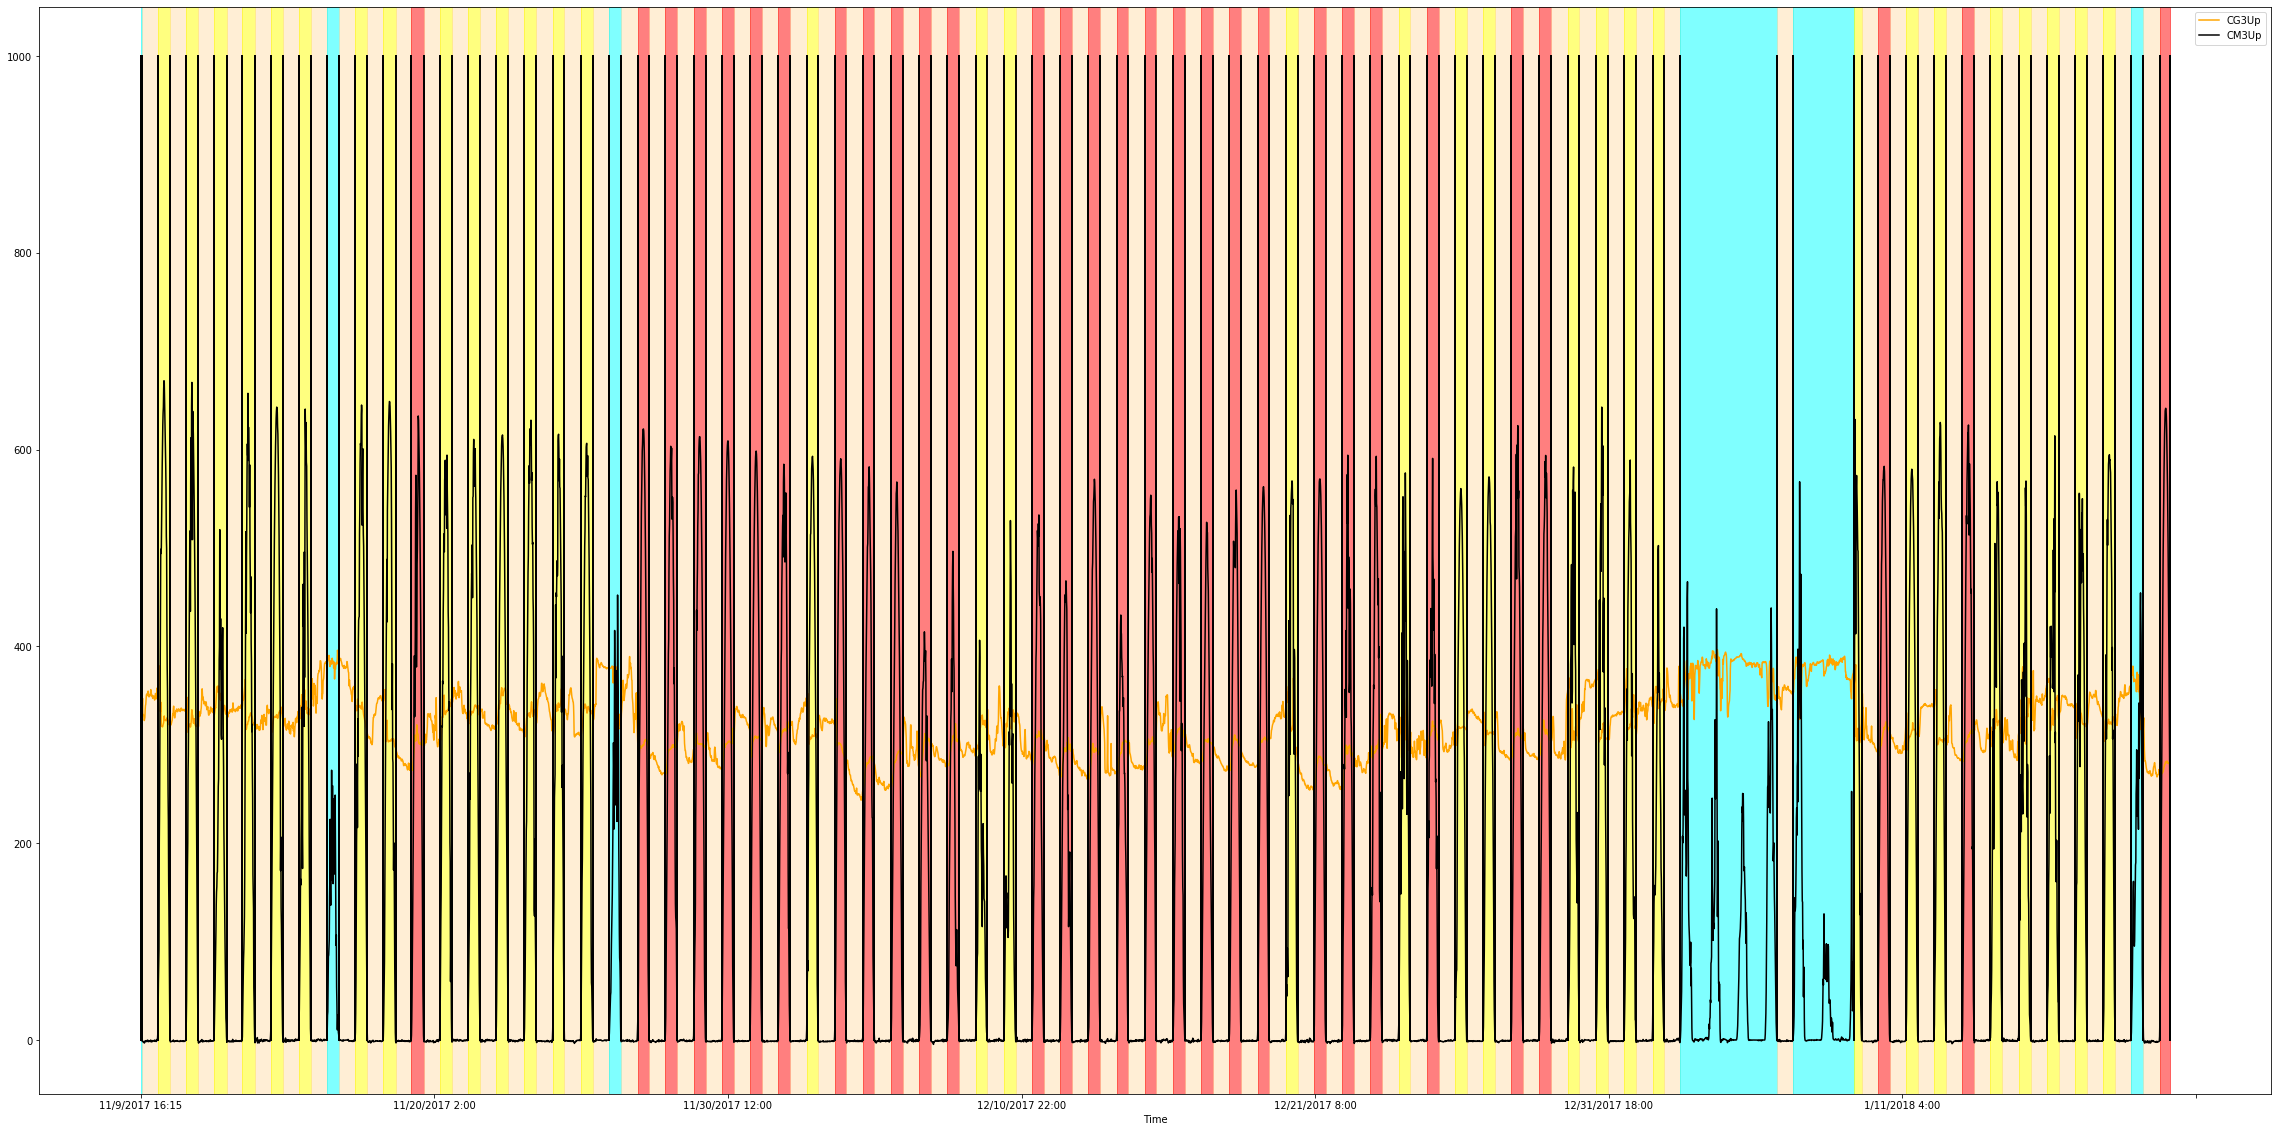

In [7]:
df2['Time'] = timep
df2 = df2.set_index('Time')
ax = df2.plot(figsize=(40,20), color= ['orange','black'])


#add in cluster lines
for i in cluster_index:
    plt.plot([i,i], [0,1000], 'k-', lw=2)
    
for i in range(len(cluster_index)):
    if i == (len(cluster_index)-1):
        break
    if cluster_high[i] == 0:
        plt.axvspan(cluster_index[i], cluster_index[i+1], color='cyan', alpha=0.5)
    elif cluster_high[i] == 1.0:
        plt.axvspan(cluster_index[i], cluster_index[i+1], color='red', alpha=0.5)
    elif cluster_high[i] == 2.0:
        plt.axvspan(cluster_index[i], cluster_index[i+1], color='navajowhite', alpha=0.5)
    elif cluster_high[i] == 3.0:
        plt.axvspan(cluster_index[i], cluster_index[i+1], color='yellow', alpha=0.5)
    elif cluster_high[i] == 4.0:
        plt.axvspan(cluster_index[i], cluster_index[i+1], color='pink', alpha=0.5)
    elif cluster_high[i] == 5.0:
        plt.axvspan(cluster_index[i], cluster_index[i+1], color='white', alpha=0.5)
    elif cluster_high[i] == 6.0:
        plt.axvspan(cluster_index[i], cluster_index[i+1], color='grey', alpha=0.5)
        

        
plt.show()
#plt.savefig('TICC1.png', transparent = True)

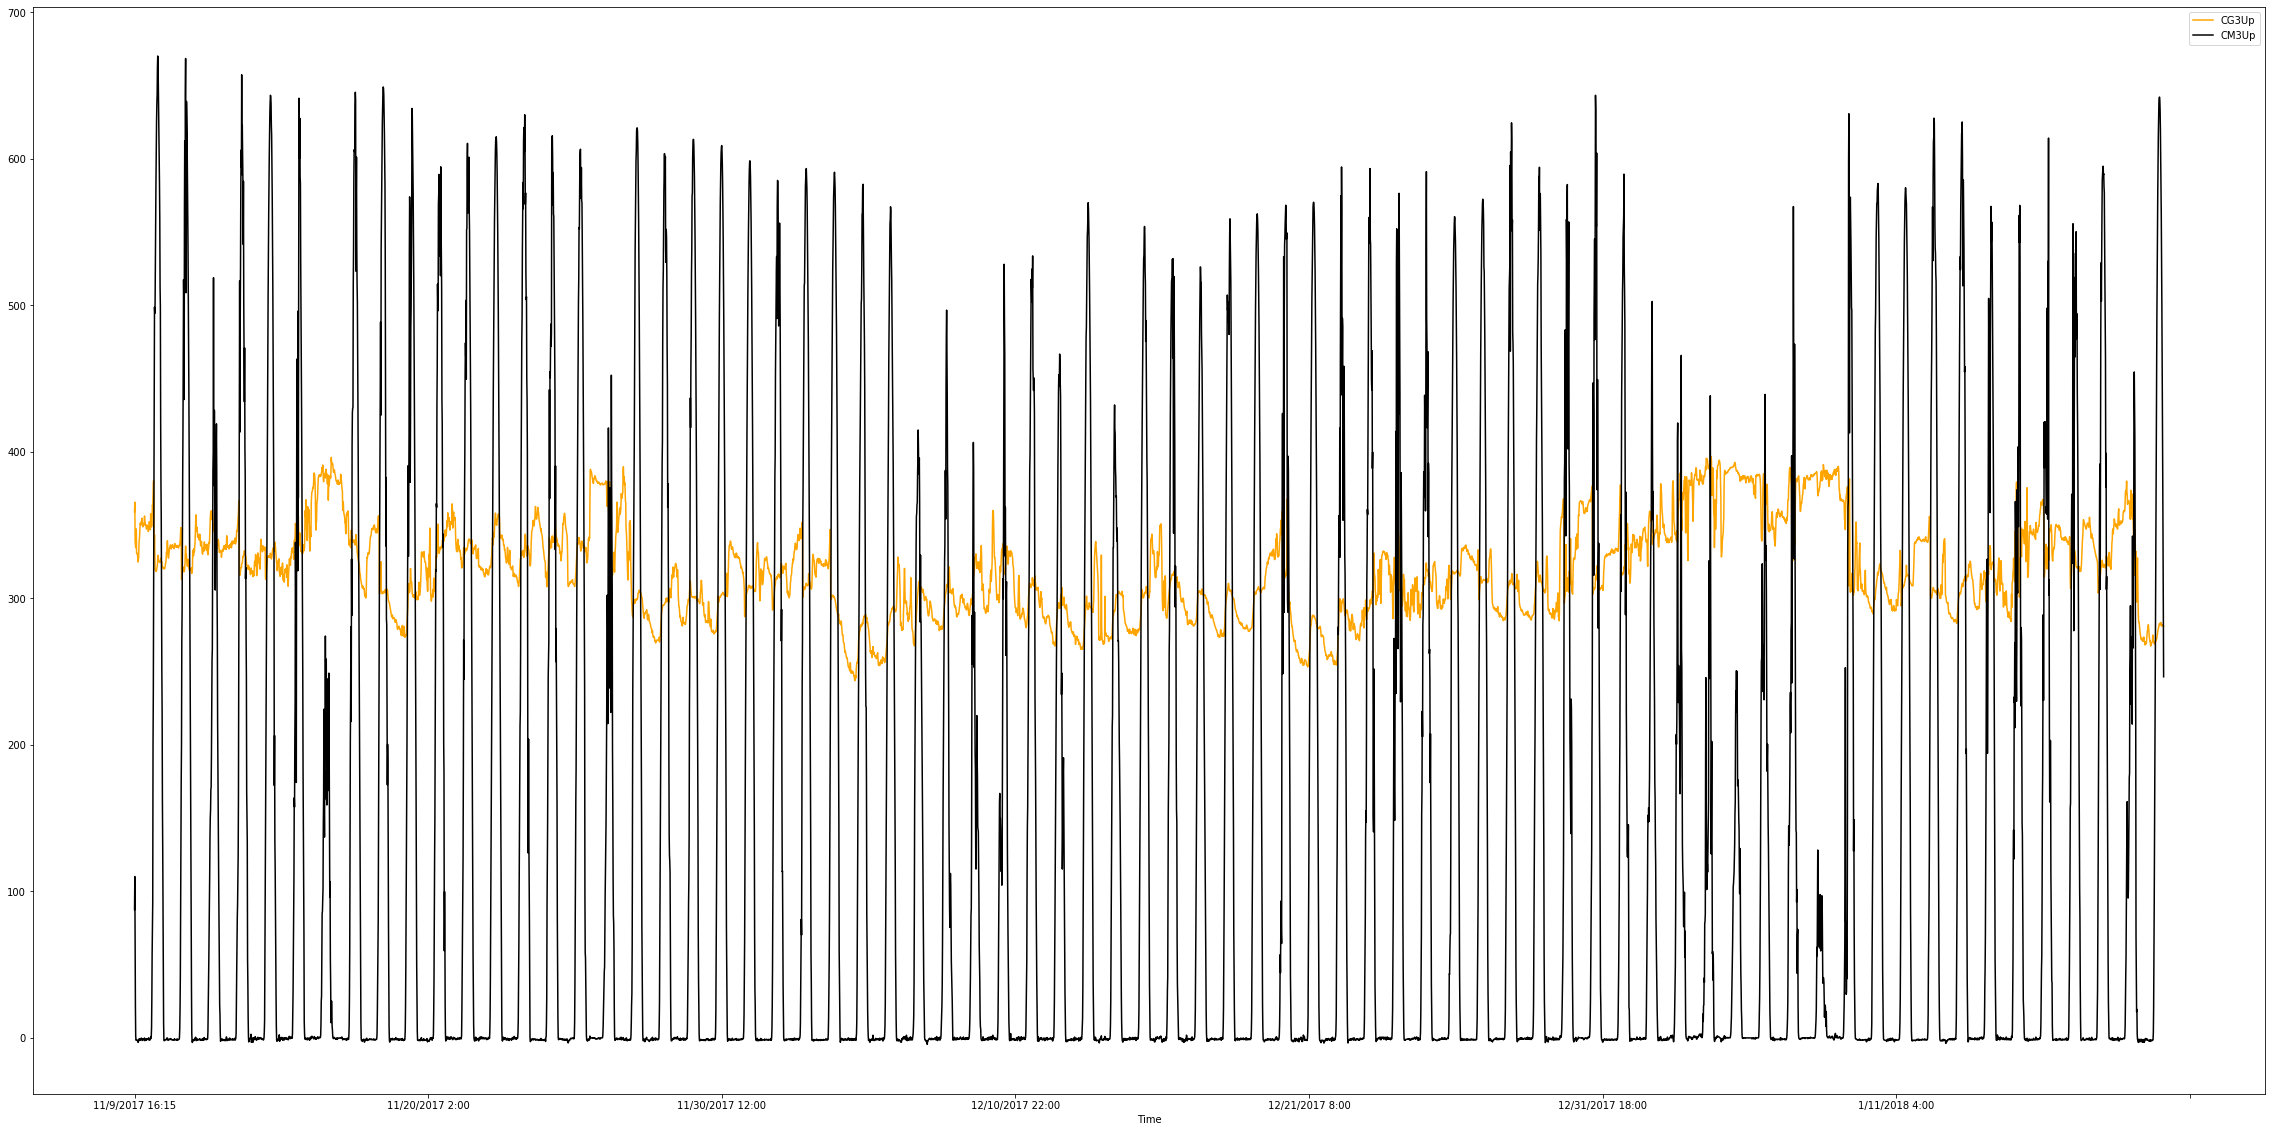

In [9]:
ax2 = df2.plot(figsize=(40,20), color= ['orange','black'])

In [26]:
#Classification Accuracy refer to excel for indexes
#cloudy cluster

cloud =cluster_assignment[[275, 658, 1619, 5267, 5363, 5459, 5555, 5651, 5747, 5843, 6803]]

#smokey
smoke = cluster_assignment[[2386,2484, 2580, 2675, 2772, 2868, 2964, 3060, 3155, 3251, 3348, 3444, 3540,3636,3732,3828,4980,6035, 6515]]
smoke

array([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 3.0000, 3.0000, 1.0000,
       1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
       3.0000, 3.0000, 3.0000])